In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Nomes para as colunas
columns = ["Estacao","Data","Hora","Prec","TempMax","TempMin","Insolacao","EvapoPiche","TempCompMedia",
           "UmidRelatMedia", "VelocVento", "Missing"]

#Tipos de dados em cada coluna
types = {"Hora":np.uint16,"Prec":np.float64,"TempMax":np.float64,"TempMin":np.float64,"Insolacao":np.float64,
         "EvapoPiche":np.float64,"TempCompMedia":np.float64,"UmidRelatMedia":np.float64,"VelocVento":np.float64}

#Leitura do arquivo csv
dataSet = pd.read_csv("https://github.com/gilvandrocesardemedeiros/ClimatePrediction/raw/master/Dados_INMET/Diarios/INMET-Dados_Diarios_Natal_1968-2018.csv",sep=';',skiprows=48, nrows = 27003,
          usecols = columns[1:11], names=columns, dtype = types)

In [3]:
#Verificando dados
dataSet.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,24/01/1968,1200,1.8,NaN,20.5,NaN,NaN,NaN,NaN,NaN
1,25/01/1968,0,NaN,27.6,NaN,0.0,4.3,23.92,93.25,1.333333
2,25/01/1968,1200,24.2,NaN,20.6,NaN,NaN,NaN,NaN,NaN
3,26/01/1968,0,NaN,29.5,NaN,2.6,2.5,24.76,93.25,2.333333
4,26/01/1968,1200,9.6,NaN,22.3,NaN,NaN,NaN,NaN,NaN


In [0]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [5]:
#Verificando o tipo dos dados
dataSet.dtypes

Data              datetime64[ns]
Hora                      uint16
Prec                     float64
TempMax                  float64
TempMin                  float64
Insolacao                float64
EvapoPiche               float64
TempCompMedia            float64
UmidRelatMedia           float64
VelocVento               float64
dtype: object

In [0]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [7]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
1,1968-01-25,0,NaN,27.6,NaN,0.0,4.3,23.92,93.25,1.333333
3,1968-01-26,0,NaN,29.5,NaN,2.6,2.5,24.76,93.25,2.333333
5,1968-01-27,0,NaN,29.9,NaN,5.3,2.3,25.16,86.00,2.666667
7,1968-01-28,0,NaN,31.0,NaN,3.5,3.5,25.74,86.00,3.333333
9,1968-01-29,0,NaN,31.0,NaN,9.4,4.4,26.02,80.00,5.000000


In [8]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.head()

,Data,Hora,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,1968-01-24,1200,1.8,NaN,20.5,NaN,NaN,NaN,NaN,NaN
2,1968-01-25,1200,24.2,NaN,20.6,NaN,NaN,NaN,NaN,NaN
4,1968-01-26,1200,9.6,NaN,22.3,NaN,NaN,NaN,NaN,NaN
6,1968-01-27,1200,2.6,NaN,21.3,NaN,NaN,NaN,NaN,NaN
8,1968-01-28,1200,3.8,NaN,22.3,NaN,NaN,NaN,NaN,NaN


In [0]:
#Transformando a data no índice de cada dataframe
dataSet00 = dataSet00.set_index("Data")
dataSet12 = dataSet12.set_index("Data")

In [0]:
#Descartando a coluna "Hora"
dataSet00, dataSet12 = dataSet00.drop(columns = "Hora"), dataSet12.drop(columns = "Hora")

In [11]:
#Juntando os dados em um mesmo dataframe (no caso, o dataSet00)
for i in dataSet00.index:
    try:
        dataSet00["Prec"].loc[i] = dataSet12["Prec"].loc[i]
        dataSet00["TempMin"].loc[i] = dataSet12["TempMin"].loc[i]
    except:
        print("Data " + str(i.day) + "/" + str(i.month) + "/" + str(i.year) + " Não encontrada!")

Data 5/7/1986 Não encontrada!
Data 20/7/1986 Não encontrada!
Data 3/6/1989 Não encontrada!
Data 12/6/1989 Não encontrada!
Data 4/12/1992 Não encontrada!
Data 26/5/2018 Não encontrada!
Data 1/8/2018 Não encontrada!
Data 27/10/2018 Não encontrada!


In [0]:
#Atribuindo à variável dataSet o DataFrame atualizado
dataSet = dataSet00

In [0]:
#Eliminando dias que estejam faltando variáveis
dataSet = dataSet.dropna()

In [14]:
#Verificando DataFrame
dataSet.head()

,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
Data,,,,,,,,
1968-01-25,24.2,27.6,20.6,0.0,4.3,23.92,93.25,1.333333
1968-01-26,9.6,29.5,22.3,2.6,2.5,24.76,93.25,2.333333
1968-01-27,2.6,29.9,21.3,5.3,2.3,25.16,86.00,2.666667
1968-01-28,3.8,31.0,22.3,3.5,3.5,25.74,86.00,3.333333
1968-01-29,0.0,31.0,22.1,9.4,4.4,26.02,80.00,5.000000


In [0]:
#Transformando a coluna Data de volta em uma coluna de informações do dataSet
dataSet = dataSet.reset_index()

In [16]:
#Verificando DataFrame
dataSet

,Data,Prec,TempMax,TempMin,Insolacao,EvapoPiche,TempCompMedia,UmidRelatMedia,VelocVento
0,1968-01-25,24.2,27.6,20.6,0.0,4.3,23.92,93.25,1.333333
1,1968-01-26,9.6,29.5,22.3,2.6,2.5,24.76,93.25,2.333333
2,1968-01-27,2.6,29.9,21.3,5.3,2.3,25.16,86.00,2.666667
3,1968-01-28,3.8,31.0,22.3,3.5,3.5,25.74,86.00,3.333333
4,1968-01-29,0.0,31.0,22.1,9.4,4.4,26.02,80.00,5.000000
5,1968-01-31,1.0,31.6,21.1,11.1,3.9,25.66,81.25,2.000000
6,1968-02-01,0.0,31.2,20.7,10.6,4.0,25.38,85.00,4.000000
7,1968-02-02,0.0,32.0,21.1,10.7,4.3,26.02,80.75,2.000000
8,1968-02-03,0.0,31.9,21.3,10.8,4.1,26.26,87.25,2.333333
9,1968-02-04,0.0,31.4,21.1,11.3,4.1,25.50,82.50,3.666667


In [0]:
#Separando a variável que será prevista (Y) em função das demais variáveis (X)
X = dataSet.drop(columns = ["TempMax","Data"])
Y = dataSet["TempMax"]

In [18]:
#Visualizando dados
print(X)
print(type(X))
print(X.shape)

       Prec  TempMin  Insolacao  ...  TempCompMedia  UmidRelatMedia  VelocVento
0      24.2     20.6        0.0  ...          23.92           93.25    1.333333
1       9.6     22.3        2.6  ...          24.76           93.25    2.333333
2       2.6     21.3        5.3  ...          25.16           86.00    2.666667
3       3.8     22.3        3.5  ...          25.74           86.00    3.333333
4       0.0     22.1        9.4  ...          26.02           80.00    5.000000
5       1.0     21.1       11.1  ...          25.66           81.25    2.000000
6       0.0     20.7       10.6  ...          25.38           85.00    4.000000
7       0.0     21.1       10.7  ...          26.02           80.75    2.000000
8       0.0     21.3       10.8  ...          26.26           87.25    2.333333
9       0.0     21.1       11.3  ...          25.50           82.50    3.666667
10      0.0     21.4       11.1  ...          25.62           79.50    3.333333
11      0.0     20.6       10.8  ...    

In [19]:
#Visualizando dados
print(Y)
print(type(Y))
print(Y.shape)

0        27.6
1        29.5
2        29.9
3        31.0
4        31.0
5        31.6
6        31.2
7        32.0
8        31.9
9        31.4
10       31.8
11       31.4
12       30.4
13       31.6
14       30.4
15       30.9
16       31.4
17       30.6
18       31.4
19       30.5
20       31.6
21       31.2
22       31.4
23       31.8
24       32.2
25       32.2
26       30.8
27       31.5
28       31.2
29       32.2
         ... 
11857    30.2
11858    30.2
11859    30.0
11860    30.0
11861    30.0
11862    30.2
11863    30.4
11864    29.4
11865    30.0
11866    30.4
11867    30.4
11868    30.2
11869    30.0
11870    30.6
11871    30.6
11872    30.6
11873    30.6
11874    30.4
11875    30.6
11876    29.8
11877    30.4
11878    29.8
11879    30.4
11880    30.6
11881    30.4
11882    30.4
11883    30.4
11884    30.2
11885    30.0
11886    30.0
Name: TempMax, Length: 11887, dtype: float64
<class 'pandas.core.series.Series'>
(11887,)


In [0]:
#Separando conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [0]:
#Efetuando uma transformação do tipo: z = (x - u) / s, normalizando em termos do desvio padrão
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Criando um modelo de MLP
mlp = Sequential()
#Adicionando a camada de entrada
mlp.add(Dense(activation = 'tanh', input_dim = 7, units = 7, kernel_initializer = 'uniform'))
#Adicionando a camada escondida
mlp.add(Dense(activation = 'tanh', units = 7, kernel_initializer = 'uniform'))
#Adicionando a camada de saída
mlp.add(Dense(units = 1, kernel_initializer='normal'))
# Compilando o modelo
mlp.compile(loss='mse', optimizer='adam', metrics=['mae'])
#Mostrando um sumário do modelo de MLP criada
mlp.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Treinando a MLP rede, a partir do modelo de MLP criado
rede = mlp.fit(X_train, Y_train, epochs=100, verbose=1, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 9628 samples, validate on 1070 samples
Epoch 1/100
9628/9628 [==============================] - 1s 97us/step - loss: 806.6837 - mean_absolute_error: 28.3527 - val_loss: 680.4302 - val_mean_absolute_error: 26.0573
Epoch 2/100
9628/9628 [==============================] - 0s 31us/step - loss: 601.9603 - mean_absolute_error: 24.4902 - val_loss: 529.8088 - val_mean_absolute_error: 22.9860
Epoch 3/100
9628/9628 [==============================] - 0s 31us/step - loss: 477.2323 - mean_absolute_error: 21.8018 - val_loss: 423.1119 - val_mean_absolute_error: 20.5343
Epoch 4/100
9628/9628 [==============================] - 0s 32us/step - loss: 381.1267 - mean_absolute_error: 19.4748 - val_loss: 336.8065 - val_mean_absolute_error: 18.3126
Epoch 5/100
9628/9628 [==============================] - 0s 31us/step - loss: 302.2284 - mean_absolute_error: 17.3333 - val_loss: 265.3279 - val_mean_absolute_error: 16.2441
Epoch 6/100
9628/9628 [===========

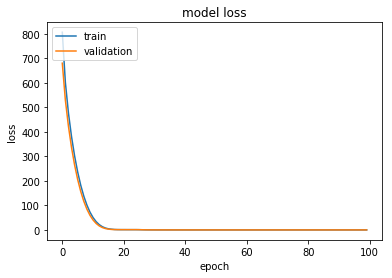

In [24]:
#Mostrando o processo de treino graficamente
plt.plot(rede.history['loss'])
plt.plot(rede.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
#Fazendo uma previsão com base nos dados de teste
Y_previsto = mlp.predict(X_test)

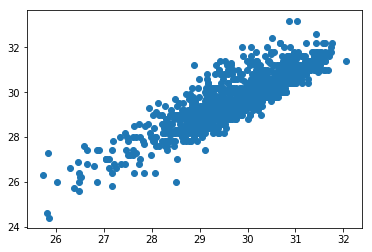

In [27]:
#Gráfico do valor previsto x valor real
plt.scatter(Y_previsto, Y_test)

In [28]:
#Calculando e mostrando o erro médio quadrático entre o Y previsto e o Y real
mse = mean_squared_error(Y_previsto, Y_test)
print(mse)

0.3167351765228808
